In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn import metrics, datasets, cluster
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import LabelEncoder

In [2]:
df1=pd.read_excel('ABBREV.xlsx')

In [ ]:
print(df1.shape)

# Example Flow & Explanation

In [ ]:
#Let's say this is the user's input in our super-admin page
x0 = 'Champorado'
x01 = '8790'
x1 = '4.56'
x2 = '394'
x3 = '10.99'
x4 = '6.36'
x5 = '4.60'
x6 = '73.48'

In [ ]:
#Let's limit only our columns first since our input conists of 6 only
example_df = df1[['NDB_No','Water_(g)',
'Energ_Kcal','Protein_(g)','Lipid_Tot_(g)',
'Ash_(g)','Carbohydrt_(g)']]
example_df.tail()
#our input will be added in our dataframe inside of these 
# columns presented below

In [ ]:
#we will now add our input to the dataframe
new = ['0',x1,x2,x3,x4,x5,x6]
new2 = ['0',x0,x1,x2,x3,x4,x5,x6]

df1 = df1.append(pd.Series(new2, index=df1.columns[:len(new2)]), ignore_index=True)
example_df = example_df.append(pd.Series(new, index=example_df.columns[:len(new)]), ignore_index=True)
#our input is now added to our original dataframe and to what dataframe we are using
#you might be wondering about 2 variables and 2 appends, 
# df1 is our original DF and example_df is what we are currently using
#we added the input in our original DF because what we just want 
# to see here is what cluster will this food be included
print(example_df.shape)
print(df1.shape)

In [ ]:
example_df = example_df.fillna(0) 
#we will all the NaN or null values inside our 
#dataframe if the input consists of null data it will now be 0
example_df.isnull().sum() 
#check if there is still NaN in our DF

In [ ]:
ex = StandardScaler().fit_transform(example_df)
ex

In [ ]:
kmeans = KMeans(n_clusters=4) 

# fit kmeans object to data
kmeans.fit(ex)

In [ ]:
y_predicted = kmeans.fit_predict(example_df)
print(y_predicted)

In [ ]:
example_df['cluster']=y_predicted
example_df.head()

In [ ]:
#merge here
example_df = example_df[['NDB_No','cluster']]
example_df = pd.merge(df1, example_df)
example_df.tail()

# Finalization

In [18]:
class example_class:
    example_df = df1[['NDB_No','Water_(g)','Energ_Kcal',
    'Protein_(g)','Lipid_Tot_(g)','Ash_(g)','Carbohydrt_(g)']]

    max = int(example_df.iloc[-1]['NDB_No'])

    foodId = max+1
    food_name = input("Food name: ")
    data1 = input("Nutrient 1: ")
    data2 = input("Nutrient 2: ")
    data3 = input("Nutrient 3: ")
    data4 = input("Nutrient 4: ")
    data5 = input("Nutrient 5: ")
    data6 = input("Nutrient 6: ")

    users_inputdf1 = [foodId,food_name,data1,data2,data3,data4,data5,data6]
    users_inputex = [foodId,data1,data2,data3,data4,data5,data6]

    example_df = example_df.append(pd.Series(users_inputex, 
    index=example_df.columns[:len(users_inputex)]), ignore_index=True)
    df1 = df1.append(pd.Series(users_inputdf1, 
    index=df1.columns[:len(users_inputdf1)]), ignore_index=True)

    example_df = example_df.fillna(0)

    ex = StandardScaler().fit_transform(example_df)

    kmeans = KMeans(n_clusters=4)
    kmeans.fit(ex)
    KMeans(n_clusters=4)

    y_predict = kmeans.fit_predict(example_df)
    example_df['cluster'] = y_predict
    example_df = example_df[['NDB_No','cluster']]
    example_df = pd.merge(df1, example_df)

    source = example_df[example_df['NDB_No'] == foodId]
    final_food_name = source.iloc[-1]['Shrt_Desc']
    cluster = source.iloc[-1]['cluster']
    final_foodId = source.iloc[-1]['NDB_No']

    print("Food name is '",final_food_name,"' with food id of '",final_foodId,
    "' and your cluster is in cluster '",cluster,"'")

Food name is ' sure na ba ' with food id of ' 93604 ' and your cluster is in cluster ' 2 '


In [19]:
example_class.example_df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
8789,93600,"TURTLE,GREEN,RAW",78.5,89,19.8,0.5,1.2,0.0,0.0,0.0,...,0.127,0.088,0.17,50.0,85.0,3 oz,NaN,NaN,0.0,2
8790,93601,lason,2,3,2,3,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8791,93602,lason ulit,2,3,2,3,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8792,93603,siguro,2,3,2,3,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8793,93604,sure na ba,10,20,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


**Trial and error section**

In [ ]:
import pickle
#di nagamit
pickle.dump(example_class, open('example.pkl','wb'))

In [ ]:
#print(example_df.tail())
#print(example_df.shape)
print(df1.shape)
df1.tail()

In [ ]:
example = {'id':['10002','10003','10004'],
'value':['23232323232323', 'ggg', 'asdasdas']}
example = pd.DataFrame(example)

#data1 = int(input("Nutrient 1: "))
#data2 = input("Nutrient 1: ")

users_inputdf1 = [data1,data2]
example = example.append(pd.Series(users_inputdf1, 
index=example.columns[:len(users_inputdf1)]), ignore_index=True)

max = int(example.iloc[-1]['id'])
max = max+1
max

#max_id = 10002
##example['id'] = (max_id + 1, max_id + len(example)+1)

#example = pd.DataFrame(df1)
#x = (max_id + 1, max_id + len(example) + 1)


# Pre-processing and Evaluation

In [2]:
original = pd.read_excel('ABBREV.xlsx')

In [3]:
original.shape

(8790, 53)

In [4]:
le = LabelEncoder()
original['GmWt_Desc2'] = le.fit_transform(original['GmWt_Desc2'])
original['GmWt_Desc1'] = le.fit_transform(original['GmWt_Desc1'])
#from string to integer

In [5]:
original.columns

Index(['NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct'],
      dtype='object')

In [6]:
feature = ['Water_(g)', 'Energ_Kcal', 'Protein_(g)',
       'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)',
       'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct']

nutrientsDf = original[feature]

In [7]:
nutrientsDf.isnull().sum()

Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(µg)      3270
Lycopene_(µg)        3292
Lut+Zea_ (µg)        3315
Vit_E_(mg)  

In [8]:
nutrientsDF = nutrientsDf.fillna(0)
nutrientsDF.isnull().sum()

Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0
Vit_D_µg             0
Vit_D_IU             0
Vit_K_(µg)           0
FA_Sat_(g)           0
FA_Mono_(g)

In [9]:
standardScaledX = StandardScaler().fit_transform(nutrientsDF)
standardScaledX

array([[-1.24244853,  2.88861189, -0.99648372, ..., -0.39892732,
         0.37492552, -0.40933108],
       [-1.2148285 ,  2.89449882, -1.03067216, ..., -0.4144397 ,
         0.37492552, -0.40933108],
       [-1.75033218,  3.82463349, -1.05061542, ...,  0.21768966,
        -1.54824934, -0.40933108],
       ...,
       [-0.91328273,  0.25126803, -1.07720643, ..., -0.4448181 ,
         0.85226029, -0.40933108],
       [ 0.81540634, -0.80249213,  0.45177663, ..., -0.4448181 ,
         0.85226029, -0.40933108],
       [ 0.79266044, -0.80837906,  0.80315783, ..., -0.4448181 ,
         0.85226029, -0.40933108]])

**Algorithm**

In [69]:
#from kmodes.kmodes import KModes
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=4, verbose=1).fit(standardScaledX)

Initialization complete
Iteration 0, inertia 458846.726930842
Iteration 1, inertia 384304.91713719955
Iteration 2, inertia 380657.47378250293
Iteration 3, inertia 379950.7428800918
Iteration 4, inertia 379639.9664495318
Iteration 5, inertia 379462.2899275963
Iteration 6, inertia 379364.0436351576
Iteration 7, inertia 379322.99513467244
Iteration 8, inertia 379284.06077994965
Iteration 9, inertia 379263.9052858755
Iteration 10, inertia 379236.24898513674
Iteration 11, inertia 379201.49790198705
Iteration 12, inertia 379150.5291462581
Iteration 13, inertia 379143.2889314243
Iteration 14, inertia 379142.22345065646
Converged at iteration 14: center shift 1.8972723054871092e-06 within tolerance 9.999999999999849e-05.
Initialization complete
Iteration 0, inertia 471077.28259386594
Iteration 1, inertia 393290.5654583965
Iteration 2, inertia 392684.12556943356
Iteration 3, inertia 392595.2367827823
Iteration 4, inertia 392560.53363595036
Iteration 5, inertia 392514.4158473942
Iteration 6, ine

In [70]:
centers = kmeans.cluster_centers_
centers

array([[-1.38896318,  0.68916492,  0.19522306, -0.28857506,  0.87885517,
         1.56942666,  1.51509524,  0.92254088,  1.36893104,  3.28415339,
         1.74777364,  1.042107  ,  1.12263029,  0.09842569,  2.04513577,
         1.49918165,  0.79653061,  0.20453432,  0.75853723,  2.17375594,
         3.06582174,  2.82141234,  1.55893374,  3.18412937,  3.49209233,
         3.04243698,  1.45647205,  3.30195122,  0.37594547,  1.59539103,
         1.63343207,  1.65128453,  1.58688471,  0.24989446,  0.4610252 ,
         0.40539545,  0.04124615,  0.25255158,  1.01831708,  0.79951147,
         0.8009981 ,  0.43653266, -0.30417491, -0.27389749, -0.08916339,
         0.07822634, -0.63953776, -0.544702  , -0.40732887,  0.45919613,
        -0.40295226],
       [ 0.57421223, -0.514493  ,  0.07114853, -0.28419438, -0.13887883,
        -0.49216197, -0.25630216, -0.30633971, -0.16468679, -0.20722423,
        -0.23762504, -0.14136805, -0.09927161, -0.09542664, -0.0427204 ,
        -0.12525167, -0.05922

In [71]:
y_predict = kmeans.fit_predict(nutrientsDF)
y_predict

Initialization complete
Iteration 0, inertia 96006750148.02356
Iteration 1, inertia 84378237051.19177
Iteration 2, inertia 82287537079.56836
Iteration 3, inertia 74493504710.97263
Iteration 4, inertia 67437141013.37892
Iteration 5, inertia 63361545978.13612
Iteration 6, inertia 61299976755.40479
Iteration 7, inertia 60444208930.96811
Iteration 8, inertia 60013403889.74567
Iteration 9, inertia 59847945108.88346
Iteration 10, inertia 59830358056.97978
Iteration 11, inertia 59829818202.221664
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 85512745617.79419
Iteration 1, inertia 63893697633.339455
Iteration 2, inertia 61574003957.58823
Iteration 3, inertia 60822581950.086815
Iteration 4, inertia 60142822647.26973
Iteration 5, inertia 59864319657.718254
Iteration 6, inertia 59830358056.97978
Iteration 7, inertia 59829818202.221664
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 71986689267.40417
Iteration

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
nutrientsDF['cluster'] = y_predict
nutrientsDF.head()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,cluster
0,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,...,51.368,21.021,3.043,215.0,5.00,411,14.2,783,0.0,0
1,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,...,45.390,19.874,3.331,225.0,3.80,411,9.4,783,0.0,0
2,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,...,61.924,28.732,3.694,256.0,12.80,670,205.0,227,0.0,0
3,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,...,18.669,7.778,0.800,75.0,28.35,368,17.0,224,0.0,0
4,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,...,18.764,8.598,0.784,94.0,132.00,219,113.0,273,0.0,0


Text(0.5, 1.0, 'Centers: {} {} {}')

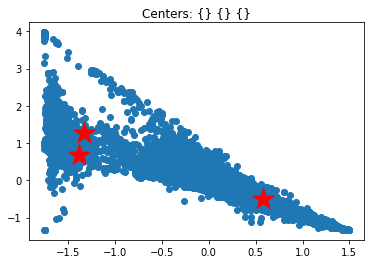

In [88]:
plt.scatter(standardScaledX[:,0], standardScaledX[:,1])
plt.scatter(centers[:,0], centers[:,1], s=500, color="red", marker="*")
plt.title("Centers: {} {} {}")

Text(0.5, 1.0, 'Centers: {} {} {}')

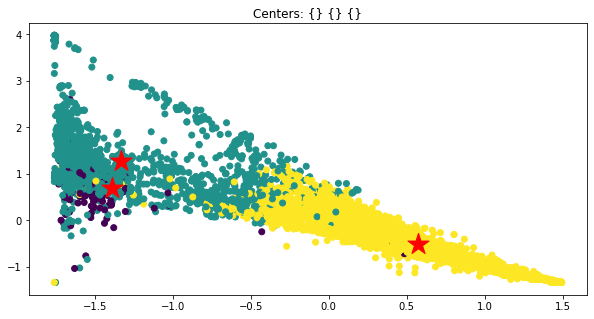

In [89]:
from sklearn import cluster
from kmodes.kmodes import KModes
cl = cluster.KMeans(n_clusters=3)
cl.fit(standardScaledX)
plt.figure(figsize=(10,5))
plt.scatter(standardScaledX[:,0], standardScaledX[:,1], 
            c=cl.predict(standardScaledX))
plt.scatter(cl.cluster_centers_[:,0],
            cl.cluster_centers_[:,1], s=500, color="red", marker="*")
plt.title("Centers: {} {} {}")

In [91]:
no_of_clusters = [2,3,4,5,6]
for n_clusters in no_of_clusters:
   cluster = KMeans(n_clusters = n_clusters)
   cluster_labels = cluster.fit_predict(standardScaledX)
   silhouette_avg = silhouette_score(standardScaledX, cluster_labels)

   #print process
   print("Cluster number", n_clusters, 
          "Score", silhouette_avg)

Cluster number 2 Score 0.5910665730687997
Cluster number 3 Score 0.23040493478239032
Cluster number 4 Score 0.2284435877233865
Cluster number 5 Score 0.15174115421358125
Cluster number 6 Score 0.15513684144277914


In [92]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(standardScaledX)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Elbow Method')

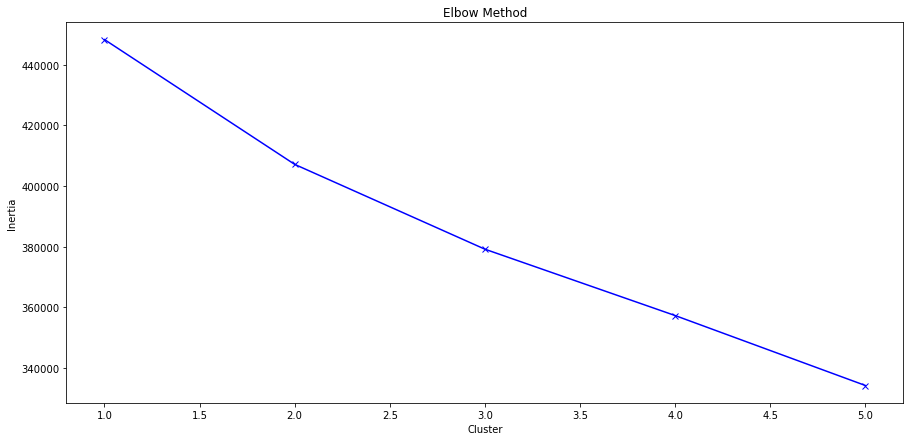

In [93]:
plt.figure(figsize=(15,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')